# 전년대비 유동감소량

In [2]:
import pandas as pd
df_subway = pd.read_pickle('modeling/data/전년유동감소폭.pickle')

In [3]:
df_subway.head()

,date,호선,역번호,역명,구분,5-6,6-7,7-8,8-9,9-10,...,18-19,19-20,20-21,21-22,22-23,23-24,24-01,합 계,요일,공휴일
0,2019-01-01,1호선,150,서울,승차,348,321,348,741,940,...,3277,2898,2590,3004,2234,970,38,39559,화요일,0
1,2019-01-01,6호선,2630,녹사평(용산구청),승차,171,117,58,81,104,...,272,212,238,239,188,72,0,3506,화요일,0
2,2019-01-01,6호선,2629,삼각지,하차,46,89,64,80,105,...,128,152,157,116,152,80,14,2411,화요일,0
3,2019-01-01,6호선,2629,삼각지,승차,48,68,51,80,110,...,269,150,125,100,74,50,0,2981,화요일,0
4,2019-01-01,6호선,2628,효창공원앞,하차,24,76,64,103,129,...,213,179,149,163,145,80,12,2533,화요일,0


In [4]:
df_subway['year'] = df_subway['date'].dt.year
df_subway['month'] = df_subway['date'].dt.month
df_subway = df_subway.query('month == 5 and 구분 == "하차"')[['역명','year','합 계']].groupby(['역명','year']).sum().unstack()
df_subway.columns = df_subway.columns.droplevel([0])
df_subway['변화량(%)'] = (df_subway[2020]-df_subway[2019])/df_subway[2019]*100
df_subway.sort_values(by=['변화량(%)'])[['변화량(%)']][:20]

year,변화량(%)
역명,
종합운동장,-67.539233
명동,-64.614933
이태원,-61.678766
한양대,-60.508550
동대입구,-57.835741
이대,-57.803681
어린이대공원(세종대),-53.232246
학여울,-53.069603
홍대입구,-51.414876


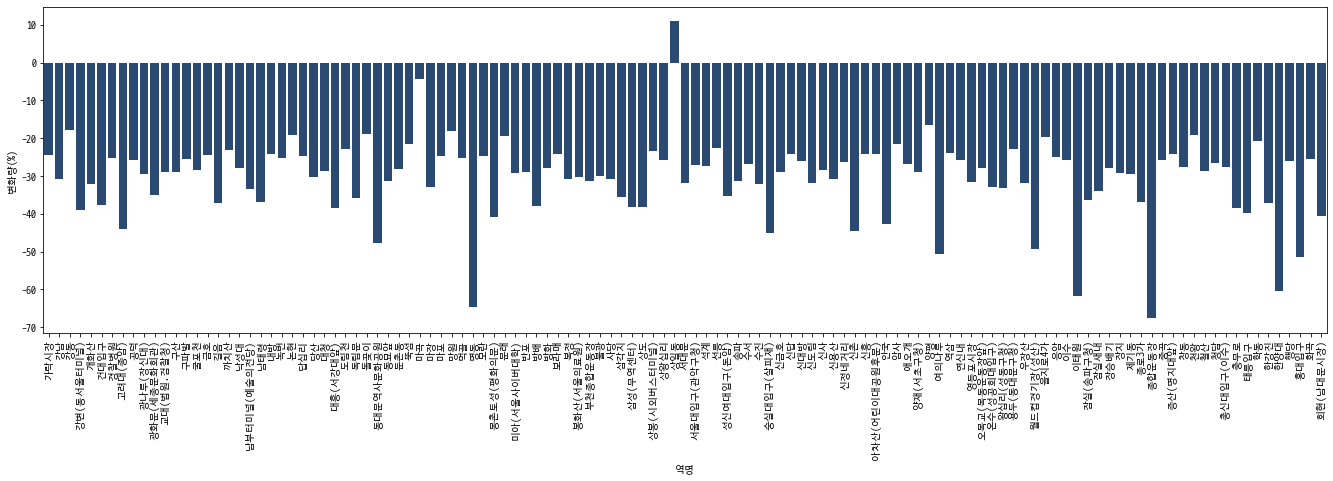

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(23,6))
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
sns.barplot(x="역명", y="변화량(%)", data=df_subway.reset_index()[::2], color = '#1F497D')

# 1분기 대비 2분기 상가수 감소

In [7]:
import re
df_sang_1 = pd.read_csv('data/상권정보/20-1분기상가업소정보_서울_202003 - 복사본.csv', encoding='ANSI')
df_sang_1[['법정동명','상호명']].groupby(['법정동명']).count()

,상호명
법정동명,
가락동,2072
가리봉동,663
가산동,3476
가양동,1225
가회동,114
...,...
후암동,346
훈정동,3
휘경동,1329


In [8]:
df_sang_2 = pd.read_csv('data/상권정보/20-2분기상가(상권)정보_서울_20200630.csv', delimiter='|',encoding='utf-8')
df_sang_2[['법정동명','상호명']].groupby(['법정동명']).count()

,상호명
법정동명,
가락동,2005
가리봉동,635
가산동,3292
가양동,1097
가회동,109
...,...
후암동,327
훈정동,4
휘경동,1189


In [9]:
df_qu = pd.DataFrame(columns=['1분기','2분기'])

In [10]:
df_qu['1분기'] = df_sang_1[['법정동명','상호명']].groupby(['법정동명']).count()['상호명']
df_qu['2분기'] = df_sang_2[['법정동명','상호명']].groupby(['법정동명']).count()['상호명']

In [11]:
df_qu['변화량'] = (df_qu['2분기'] - df_qu['1분기'])/df_qu['1분기']*100

In [12]:
df_qu.sum()

1분기    391500.000000
2분기    370321.000000
변화량     -1744.580447
dtype: float64

In [13]:
#이상치제거위해 상위 하위 10개 버림
df_qu.sort_values(by=['변화량'])[10:-10].mean()

1분기    853.130045
2분기    809.008969
변화량     -3.905912
dtype: float64

In [14]:
df_qu.index

Index(['가락동', '가리봉동', '가산동', '가양동', '가회동', '갈월동', '갈현동', '강일동', '개봉동', '개포동',
       ...
       '회현동2가', '회현동3가', '효자동', '효제동', '효창동', '후암동', '훈정동', '휘경동', '흑석동',
       '흥인동'],
      dtype='object', name='법정동명', length=466)

In [15]:
# 종합운동장 명동 이태원 한양대 동대입구 이대 어린이대공원(세종대) 학여울 홍대입구 여의나루 에 해당하는 법정동명 
df_g = df_qu.query('법정동명 in ["잠실동", "충무로2가","이태원동","행당동","장충동2가", "대현동", "군자동","대치동","서교동", "여의도동"]')

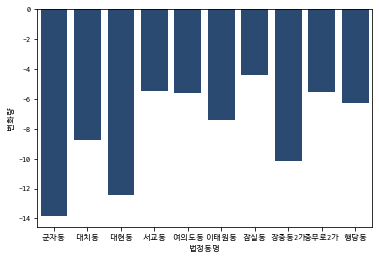

In [16]:
sns.barplot(x="법정동명", y="변화량", data=df_g.reset_index(),color="#1F497D")

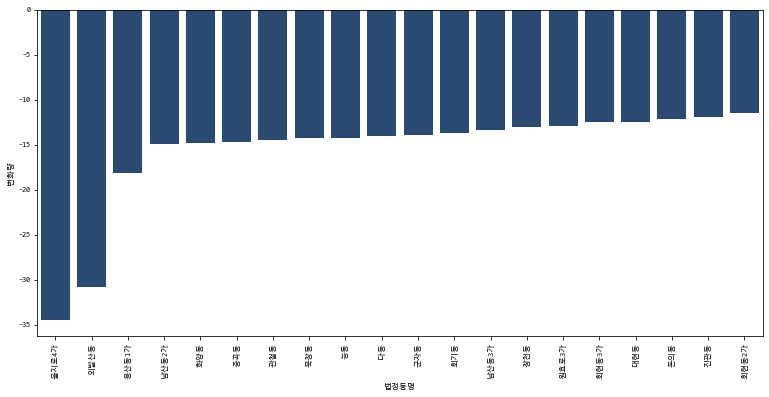

In [17]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)

sns.barplot(x="법정동명", y="변화량", data=df_qu.sort_values(by=['변화량'])[:20].reset_index(),color="#1F497D")

# 상가 종류 별 감소수

In [18]:
df_sang_2

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19964615,석봉토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,1121510300100770047020647,NaN,"서울특별시 광진구 자양로39길 20, (구의동)",143200,4992.0,NaN,1,NaN,127.088387,37.549245
1,19977290,피자마루,약수점,Q,음식,Q07,패스트푸드,Q07A01,피자전문,I56192,...,1114016200103720095000001,현진빌딩,"서울특별시 중구 동호로7길 37, (신당동)",100450,4596.0,NaN,1,NaN,127.010861,37.552153
2,19979960,홍능갈비,NaN,Q,음식,Q01,한식,Q01A02,갈비/삼겹살,I56111,...,1150010300110860003013118,NaN,"서울특별시 강서구 화곡로18길 31, (화곡동)",157010,7718.0,NaN,1,NaN,126.836078,37.538927
3,19983535,초밥왕,NaN,Q,음식,Q03,일식/수산물,Q03A03,음식점-초밥전문,I56113,...,1171010200100070028000237,현대타워아파트,"서울특별시 송파구 올림픽로 293-19, (신천동, 현대타워아파트)",138735,5510.0,NaN,1,NaN,127.102490,37.515149
4,19969945,에브리돈,북가좌점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1141011900103070003002306,NaN,"서울특별시 서대문구 응암로 65, (북가좌동)",120130,3681.0,NaN,1,NaN,126.910288,37.579029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370316,16458448,행운수산,NaN,Q,음식,Q03,일식/수산물,Q03A02,음식점-일식,I56113,...,1141012000201240001000006,DMC파크뷰자이,"서울특별시 서대문구 가재울미래로 2, (남가좌동, DMC파크뷰자이아파트)",120121,3711.0,201,NaN,110,126.916677,37.574907
370317,16475509,T.O.Ppc방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1156012700100230004022239,NaN,"서울특별시 영등포구 선유서로 117, (양평동3가)",150103,7269.0,NaN,1,B101,126.886101,37.526156
370318,16468028,철민사,NaN,D,소매,D05,의복의류,D05A06,맞춤양장/양장점,G47413,...,1114015300100190001013750,평화시장,"서울특별시 중구 청계천로 246, (방산동)",100811,4563.0,NaN,2,151,127.004702,37.569357
370319,16458247,창업마켓,NaN,F,생활서비스,F13,기타서비스업,F13A01,사업경영상담,M71531,...,1165010600100430012019672,씨티빌,"서울특별시 서초구 신반포로43길 44, (잠원동, 시티빌)",137906,6529.0,NaN,NaN,201,127.017681,37.511933


In [19]:
df_sang_1_cat = df_sang_1[['상권업종대분류명','상호명']].groupby(['상권업종대분류명']).count()
df_sang_2_cat = df_sang_2[['상권업종대분류명','상호명']].groupby(['상권업종대분류명']).count()

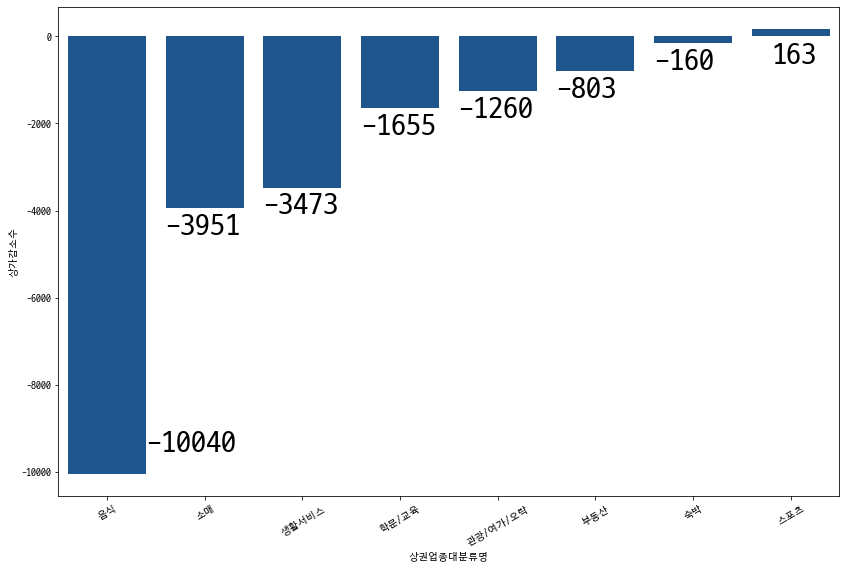

In [20]:
data_cat = df_sang_2_cat - df_sang_1_cat
data_cat.rename(columns={'상호명':'상가감소수'}, inplace=True)
pal = sns.color_palette("Blues_r")
plt.figure(figsize=(14,9))
plt.rcParams.update({'font.size': 10})
for idx, score in enumerate(data_cat.sort_values(by=['상가감소수'], ascending=True)['상가감소수']):
    if 0>score>-5000:
        plt.text(idx-0.4, score-600, score, size=30, weight='bold',)
    elif score>0:
        plt.text(idx-0.2, score-800, score, size=30, weight='bold',)
    else:
        plt.text(idx+0.4, score+500, score, size=30, weight='bold',)
plt.xticks(rotation=30)
sns.barplot(x="상권업종대분류명", y="상가감소수", data=data_cat.sort_values(by=['상가감소수'], ascending=True).reset_index(), palette=pal[0:1])